In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
import keras

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = []
labels = []

In [4]:
parasitized = "C:/Users/agarw/Desktop/Springboard/Course/DSC/Projects_in_progress/CapstoneProject2/Data/Parasitized/"
for filename in os.listdir(parasitized):
    img = cv2.imread(parasitized+filename)     # Read image as an array
    if img is not None:
        img_arr = Image.fromarray(img , 'RGB') #Converting image from array to an RGB image.
        re_img = img_arr.resize((64 , 64))     #Resizing image
        data.append(np.array(re_img))          #appending image after converting it back to array
        labels.append(1)

In [5]:
uninfected = "C:/Users/agarw/Desktop/Springboard/Course/DSC/Projects_in_progress/CapstoneProject2/Data/Uninfected/"
for filename in os.listdir(uninfected):
    img = cv2.imread(uninfected+filename)
    if img is not None:
        img_arr = Image.fromarray(img , 'RGB')
        re_img = img_arr.resize((64 , 64))
        data.append(np.array(re_img))
        labels.append(0)

In [6]:
"""data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread("C:/Users/agarw/Desktop/Springboard/Course/DSC/Projects_in_progress/CapstoneProject2/Data/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        data.append(np.array(resize_img))
        label = keras.utils.to_categorical(1, num_classes=2)
        labels.append(label)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("C:/Users/agarw/Desktop/Springboard/Course/DSC/Projects_in_progress/CapstoneProject2/Data/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        data.append(np.array(resize_img))
        label = keras.utils.to_categorical(0, num_classes=2)
        labels.append(label)
        
    except AttributeError:
        print('')"""

'data = []\nlabels = []\n\nfor i in infected:\n    try:\n    \n        image = cv2.imread("C:/Users/agarw/Desktop/Springboard/Course/DSC/Projects_in_progress/CapstoneProject2/Data/Parasitized/"+i)\n        image_array = Image.fromarray(image , \'RGB\')\n        resize_img = image_array.resize((64 , 64))\n        data.append(np.array(resize_img))\n        label = keras.utils.to_categorical(1, num_classes=2)\n        labels.append(label)\n        \n    except AttributeError:\n        print(\'\')\n    \nfor u in uninfected:\n    try:\n        \n        image = cv2.imread("C:/Users/agarw/Desktop/Springboard/Course/DSC/Projects_in_progress/CapstoneProject2/Data/Uninfected/"+u)\n        image_array = Image.fromarray(image , \'RGB\')\n        resize_img = image_array.resize((64 , 64))\n        data.append(np.array(resize_img))\n        label = keras.utils.to_categorical(0, num_classes=2)\n        labels.append(label)\n        \n    except AttributeError:\n        print(\'\')'

In [7]:
labels = keras.utils.to_categorical(labels, num_classes=2)

In [8]:
data = np.array(data)
labels = np.array(labels)

In [9]:
data.shape

(27558, 64, 64, 3)

In [10]:
labels.shape

(27558, 2)

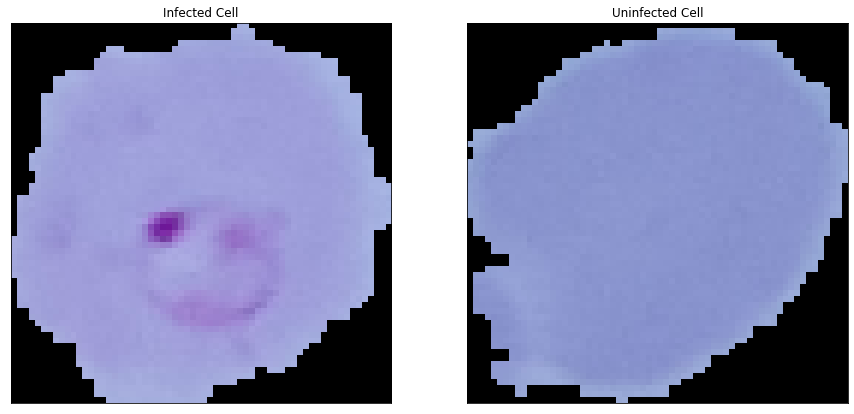

In [12]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(data[0])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(data[16000])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [13]:
n = np.arange(data.shape[0])
n = np.random.shuffle(n)

In [14]:
data = data[n]
labels = labels[n]

In [15]:
data = data[:500]
labels = labels[:500]

In [16]:
data = data.astype(np.float32)
labels = labels.astype(np.int32)

In [17]:
data = data/255

In [0]:
from sklearn.model_selection import train_test_split

train_x , eval_x , train_y , eval_y = train_test_split(data , labels , 
                                            test_size = 0.3 ,
                                            random_state = 111)

In [28]:
print('train data shape {} ,eval data shape {} '.format(train_x.shape, eval_x.shape))

train data shape (350, 64, 64, 3) ,eval data shape (150, 64, 64, 3) 


In [0]:
train_aug = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,  
    zoom_range=0.2,        
    horizontal_flip=True,
    vertical_flip=True)  

val_aug= ImageDataGenerator(
    rescale=1./255)

train_gen = train_aug.flow(
    train_x,
    train_y,
    batch_size=16)

val_gen = val_aug.flow(
    eval_x,
    eval_y,
    batch_size=16)

In [0]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [64]:
def ConvBlock(model, layers, filters,name):
    for i in range(layers):
        model.add(SeparableConv2D(filters, (3, 3), activation='relu',name=name))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.2))
    
def FCN():
    model = Sequential()
    model.add(Lambda(lambda x: x, input_shape=(64, 64, 3)))
    ConvBlock(model, 1, 64,'block_1')
    ConvBlock(model, 1, 64,'block_2')
    ConvBlock(model, 1, 64,'block_3')
    ConvBlock(model, 1, 64,'block_4')
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2,activation='sigmoid'))
    return model

model = FCN()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_9 (Lambda)            (None, 64, 64, 3)         0         
_________________________________________________________________
block_1 (SeparableConv2D)    (None, 62, 62, 64)        283       
_________________________________________________________________
batch_normalization_33 (Batc (None, 62, 62, 64)        256       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 31, 31, 64)        0         
_________________________________________________________________
block_2 (SeparableConv2D)    (None, 29, 29, 64)        4736      
_________________________________________________________________
batch_normalization_34 (Batc (None, 29, 29, 64)       

In [0]:
#-------Callbacks-------------#
best_model_weights = './base.model'
checkpoint = ModelCheckpoint(
    best_model_weights,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=7,
    verbose=2,
    mode='min'
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=40,
    verbose=1, 
    mode='auto',
    cooldown=1 
)

callbacks = [earlystop]

In [0]:
opt = SGD(lr=1e-4,momentum=0.99)

model.compile(
    loss='binary_crossentropy',
    optimizer= 'adam', #try opt1 and directly adam
    metrics=['accuracy']
)

history = model.fit_generator(
    train_gen, 
    steps_per_epoch  = 500, 
    #validation_data  = val_gen,
    #validation_steps = 2000,
    epochs = 10,
    #max_queue_size=10,
    use_multiprocessing=True,
    workers=24, 
    verbose = 1,
    callbacks=callbacks
)

Epoch 1/10
500/500 [==============================] - 44s 89ms/step - loss: 0.6455 - acc: 0.6349
Epoch 2/10
500/500 [==============================] - 41s 82ms/step - loss: 0.5192 - acc: 0.7487
Epoch 3/10
500/500 [==============================] - 41s 82ms/step - loss: 0.2599 - acc: 0.8991
Epoch 4/10
192/500 [==========>...................] - ETA: 23s - loss: 0.1993 - acc: 0.9292

In [63]:
#show_final_history(history)
#model.load_weights(best_model_weights)
model_score = model.evaluate_generator(val_gen,steps=50)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

Model Test Loss: 0.1867171586031715
Model Test Accuracy: 0.9466666668256124


In [0]:
predict = model.evaluate_generator(val_gen, steps = 5)

print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')

LOSS ON TEST DATA AFTER DATA AUGMENTATION : 1.0006207764148711
ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : 0.7125


In [0]:
preds = model.predict(eval_x, batch_size=16)
preds = np.argmax(preds, axis=-1)

# Original labels
orig_test_labels = np.argmax(eval_y, axis=-1)

print(orig_test_labels.shape)
print(preds.shape)

print(np.unique(orig_test_labels))
print(np.unique(preds))

(8268,)
(8268,)
[0 1]
[0 1]


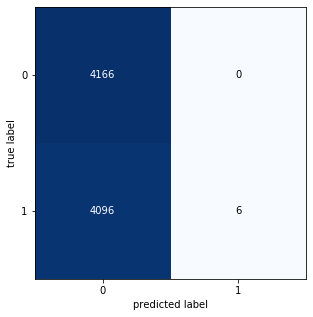

In [0]:
from sklearn.metrics import confusion_matrix
pred = model.predict(eval_x)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(eval_y,axis = 1)

CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()